In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('dfn3share.csv')
df.head()

,Unnamed: 0,user,service,count,subcat,gender
0,0,3646,92,127,15,1
1,1,3646,94,18,15,1
2,2,3646,93,19,15,1
3,3,3646,95,2,17,1
4,4,3646,114,1,15,1


In [3]:
features = ['user', 'service', 'count']

In [4]:
inertia = []
for cl_num in range(1 , 10):
    km = KMeans(n_clusters = cl_num, max_iter=100, n_init='auto', random_state= 100)
    km.fit(df)
    inertia.append(km.inertia_)


(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

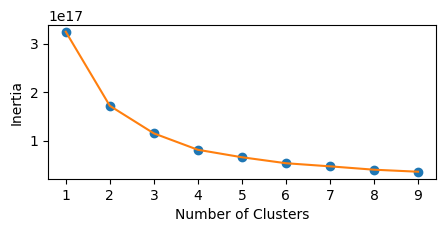

In [5]:
fig = plt.figure(figsize=(5, 2))

plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

In [6]:
# Create a subset of the data with only the selected features
subset = df[features]
# Normalize the data
normalized_data = (subset - subset.mean()) / subset.std()

In [7]:
num_clusters=5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(normalized_data)
# Get the cluster assignments for each user
cluster_assignments = kmeans.predict(normalized_data)




/home/sara/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# Assign each user to a cluster in the original DataFrame
df['cluster'] = cluster_assignments
df.head()

,Unnamed: 0,user,service,count,subcat,gender,cluster
0,0,3646,92,127,15,1,3
1,1,3646,94,18,15,1,3
2,2,3646,93,19,15,1,3
3,3,3646,95,2,17,1,0
4,4,3646,114,1,15,1,0


In [11]:
# Find similar users to a given user
user_id = 690214
user_cluster = df.loc[df['user'] == user_id, 'cluster'].iloc[0]
similar_users = df.loc[df['cluster'] == user_cluster, 'user'].unique()
similar_users = similar_users[similar_users != user_id][:5] # Exclude the given user and select 5 similar users

# Print the similar users
print(similar_users)

[  3646  78178 469578 433936 134337]


In [17]:
# Find similar services for each users 
user_id = 3646
user_cluster = df.loc[df['user'] == user_id, 'cluster'].iloc[0]
similar_users = df.loc[df['cluster'] == user_cluster, 'service'].unique()
similar_users = similar_users[similar_users != user_id][:5] # Exclude the given user and select 5 similar users

# Print the similar users
print(similar_users)

[92 94 93 96 20]


In [15]:
k = 5
km_cluster = KMeans(n_clusters = k , n_init = 'auto',max_iter=200, random_state= 120)
km_cluster.fit(df)
labels = km_cluster.labels_
centroids = km_cluster.cluster_centers_

In [16]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df, labels)

0.829366699414569